In [121]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
from scipy.spatial.distance import cdist

np.set_printoptions(suppress=True)

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # **K-Means Clustering (2 Marks)**

In [123]:
# read the given dataset
BMI_data_df = pd.read_csv('/content/drive/MyDrive/BMI_Data.csv')


# convert the dataframe into array and assign it to X
X = BMI_data_df.to_numpy()




# size of dataset
print(len(X))




# first five data points of dataset
print(X[:5])



500
[[ 67.06292382 176.0863547 ]
 [ 68.80409404 178.38866853]
 [ 60.93086317 170.28449577]
 [ 59.73384301 168.6919918 ]
 [ 65.43123003 173.76367903]]


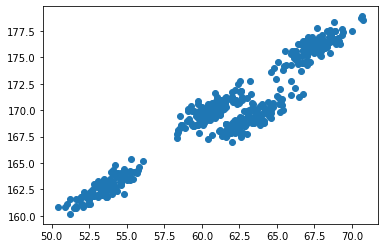

In [124]:
# plot the data points
plt.scatter(X[:, 0], X[:, 1])
plt.show()





[2901.1476611446633, 1677.9497704888538, 792.2177169084426, 640.2185943021047, 581.8938818001748, 539.6271903158716, 493.76763346304665, 450.4812280038223, 422.69978361609714]


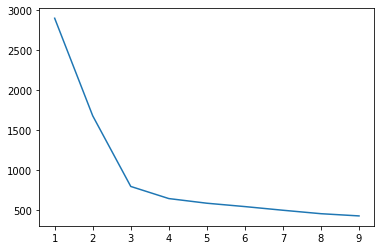

In [125]:
"""
Reference Documentation for K-Means- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
"""

# optimize hyperparameters n_clusters using elbow method. 
# Plot the objective cost (sum of distances of points from the cluster centroid) as a function of number of clusters.
# Observe the knee point in the plot and estimate the optimal number of cluster

# append the objective cost value in the distortions list

distortions = []

K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    model_KMeans = KMeans(n_clusters=k)
    model_KMeans.fit(X)
    objective_cost = 0
    cluster_centers = model_KMeans.cluster_centers_
    labels = model_KMeans.labels_
    for i in range(len(X)):
      objective_cost += ((X[i][0]-cluster_centers[labels[i]][0])**2 + (X[i][1]-cluster_centers[labels[i]][1])**2)**0.5
    distortions.append(objective_cost)
    
# Print the objective cost value for each iteration
print(distortions)



# Plot the Objective cost(Y-axis) vs Number of Clusters(X-axis) with proper axes labeling and title
plt.plot(K,distortions)



In [126]:
# Write explanation for choosing a particular number of cluster value
"""
It can be clearly observed that the elbow point is 3 as we move from 1 to 3 the objective cost drops rapidly and then it falls slowly after that.
Therefore, it is concluded that there should be 3 clusters. 
"""




'\nIt can be clearly observed that the elbow point is 3 as we move from 1 to 3 the objective cost drops rapidly and then it falls slowly after that.\nTherefore, it is concluded that there should be 3 clusters. \n'

In [127]:
# Train and predict the dataset using K-Means Algorithm for optimal K value
model_KMeans = KMeans(init='random',n_init=50,max_iter=500,tol=1e-5,random_state=3,n_clusters=3)
model_KMeans.fit(X)
cluster_centers = model_KMeans.cluster_centers_
labels = model_KMeans.labels_

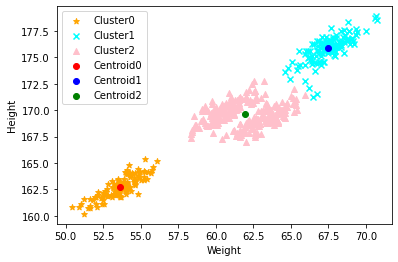

In [128]:
# plot the 3 clusters
clusters = [ [] for i in range(3) ]
for i in range(len(labels)):
    clusters[labels[i]].append([X[i][0],X[i][1]])
plt.scatter(np.array(clusters[0])[:,0],np.array(clusters[0])[:,1],color = 'orange',marker = '*',label='Cluster0')
plt.scatter(np.array(clusters[1])[:,0],np.array(clusters[1])[:,1],color = 'cyan',marker = 'x',label='Cluster1')
plt.scatter(np.array(clusters[2])[:,0],np.array(clusters[2])[:,1],color = 'pink',marker = '^',label='Cluster2')



# plot the centroids in the same plot as clusters
plt.scatter(cluster_centers[0][0],cluster_centers[0][1], color = 'red', label = 'Centroid0')
plt.scatter(cluster_centers[1][0],cluster_centers[1][1], color = 'blue', label = 'Centroid1')
plt.scatter(cluster_centers[2][0],cluster_centers[2][1], color = 'green', label = 'Centroid2')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()




# **Hierarchical Agglomerative Clustering (3 Marks)**

In [129]:
# Implement the Hierarchical Agglomerative Clustering without using sklearn library

# read the given dataset
Customer_Segmentation_Data_df = pd.read_csv('/content/drive/MyDrive/Customer_Segmentation_Data.csv')
# take random sample of 100 records of the given dataset and convert the dataframe into array and assign it to variable data
data = np.array(Customer_Segmentation_Data_df.sample(n=100))

# size of dataset
print(len(Customer_Segmentation_Data_df))

# number of datapoints(N)
print(len(data))

# first five data points of dataset
print(data[:5])

2000
100
[[1416.            1.            1.            0.44827586    0.66666667
     0.26612974    0.            0.        ]
 [1954.            1.            1.            0.32758621    0.33333333
     0.324335      0.5           0.        ]
 [1627.            0.            0.            0.34482759    0.33333333
     0.17702499    0.            0.        ]
 [1012.            1.            1.            0.48275862    0.66666667
     0.57348318    1.            0.5       ]
 [1569.            1.            1.            0.48275862    0.66666667
     0.16585994    0.            0.        ]]


In [130]:
# Write your code here
#Psuedo-Code for HAC Algorithm

# Implement the function find_HAC which will which takes the
# 1. array of data points and
# 2. Number of data points and
# 3. type of linkage
# as their parameters
def euclid_dist(a,b):
    result = 0
    for i in range(len(a)):
        result += (a[i]-b[i])**2
    return result**0.5 

def find_HAC(data, N):
    
    clusters=[[i] for i in range(N)]
    similarity_matrix = [[euclid_dist(data[i],data[j]) for j in range(len(data))] for i in range(len(data))]
    def single(a,b):
        result = float('inf')
        for x in a:
            for y in b:
                result = min(similarity_matrix[x][y],result)
        return result

    iterations = 0
    while(len(clusters)>1):
        iterations += 1
        min_dist = float('inf')
        pair = [-1,-1]
        for i in range(len(clusters)):
            for j in range(i+1,len(clusters)):
                dist = single(clusters[i],clusters[j])
                if(min_dist > dist):
                    min_dist = dist
                    pair = [i,j]
        clusters[pair[0]] = clusters[pair[0]]+clusters[pair[1]]
        clusters.remove(clusters[pair[1]])
        print('Iteration',iterations,':',clusters)

find_HAC(data,len(data))

Iteration 1 : [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23, 96], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [97], [98], [99]]
Iteration 2 : [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23, 96], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60, 65], [61], [62], [63], 

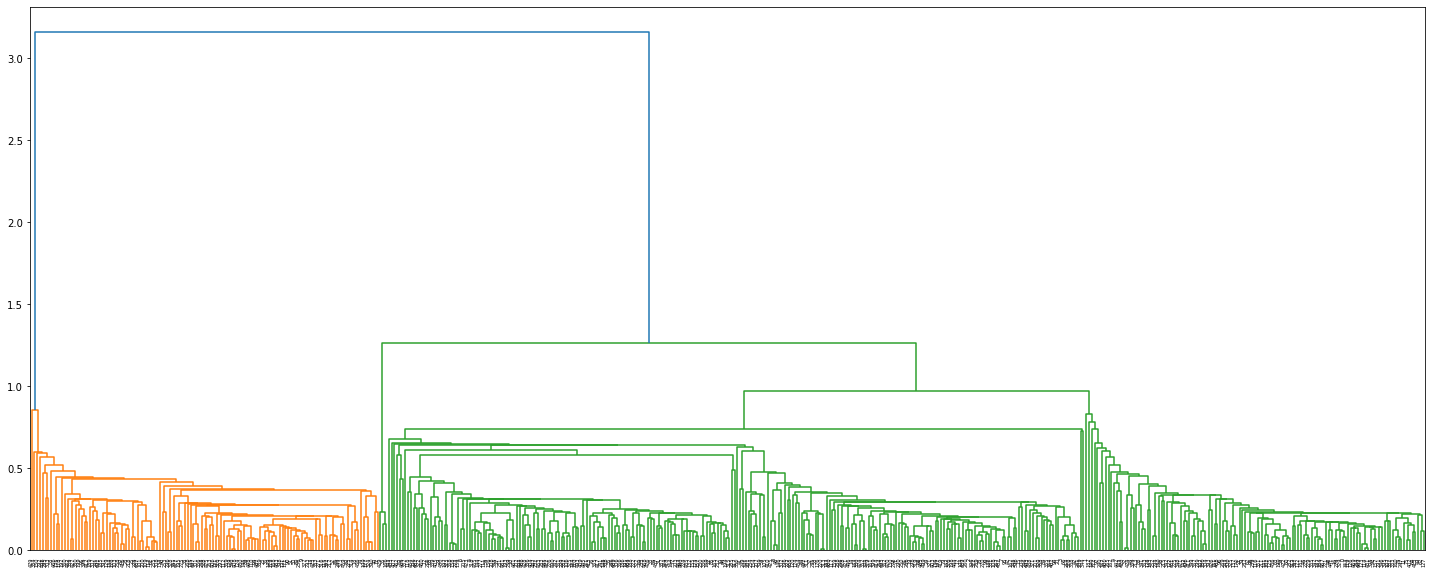

In [131]:
"""
Reference Documentation for linkage- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
Reference Documentation for dendogram- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
"""


# create the dendograms using single linkage for the BMI_Data.csv dataset
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [132]:
# Write all the informations provided by the dendogram and how to get the optimal cluster value from dendogram
"""
The leaves here are the individual data points.
The height of the vertical lines shows the degree of the difference between the two branches, more the height more the difference.
A vertical line have at its end a cluster and two of them merge to be one cluster
If we draw a horizontal line anywhere, we can get the clusters by seeing how many vertical lines cut it. 

To get the optimal cluster value find place where there is large vertical distance branches which shows that there is difference between 
the clusters and then draw the horizontal line to get the cluster value which is same as number of vertical lines cutting it.  
"""


'\nThe leaves here are the individual data points.\nThe height of the vertical lines shows the degree of the difference between the two branches, more the height more the difference.\nA vertical line have at its end a cluster and two of them merge to be one cluster\nIf we draw a horizontal line anywhere, we can get the clusters by seeing how many vertical lines cut it. \n\nTo get the optimal cluster value find place where there is large vertical distance branches which shows that there is difference between \nthe clusters and then draw the horizontal line to get the cluster value which is same as number of vertical lines cutting it.  \n'